Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).


Below, please fill in your name and collaborators, if any:

In [ ]:
NAME = "Ali Bagheri"
COLLABORATORS = ""

# Assignment 4 - Classification

In this assignment, you will practice using the kNN (k-Nearest Neighbors) algorithm to solve a classification problem.
The kNN is a simple and robust classifier, which is used in different applications.

We will use the Iris dataset for this assignment.
The dataset was first introduced by statistician R. Fisher and consists of 50 observations from each of three species Iris (_Iris setosa_, _Iris virginica_ and _Iris versicolor_). For each sample, 4 features are given: the sepal length and width, and the petal length and width.

The goal is to train kNN algorithm to distinguish the species from one another.

1. The dataset can be downloaded from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/.

2. Download `iris.data` file from the Data Folder. The Data Set description with the definitions of all the columns can be found on the dataset page - https://archive.ics.uci.edu/ml/datasets/Iris. Alternatively, you can import the data using sklearn.datasets. You will need to dowload both the sepal/petal data and the target variable information, then merge the two datasets.

3. _(1 points)_ Load the data from the file (`iris.data`) into the DataFrame. Set the names of columns according to the column definitions given in Data Description.

4. _(2 points)_ **Data inspection.** 
    - Display the first 5 rows of the dataset and use any relevant functions that can help you to understand the data.
    - Prepare 2 scatter plots - `sepal_width` vs `sepal_length` and `petal_width` vs `petal_length`. Scatter plots should show each class in different color (`seaborn.lmplot` is recommended for plotting). 

5. _(2 points)_ **Prepare the data for classification**. 
    - Using the pandas operators prepare the feature variables `X` and the response `Y` for the fit. Note that `sklean` expects data as arrays, so convert extracted columns into arrays.

6. _(1 point)_ **Split** the data into `train` and `test` using `sklearn` `train_test_split` function.

7. _(2 points)_ **Run the fit** using `KNeighborsClassifier` from `sklearn.neighbors`. 
    - First, instantiate the model,
    - Then, run the classifier on the training set.

8. _(3 points)_ Use learning model to **predict the class from features**, run prediction on `X` from test part. 
    - Show the **accuracy score** of the prediction by comparing predicted iris classes and the `Y` values from the test.
    - Comparing these two arrays (predicted classes and test `Y`), count the numbers of correct predictions and predictions that were wrong. (**HINTS:** `NumPy` arrays can be compared using `==` operator. You can also use `NumPy`'s operator `count_nonzero` to count number of non-False values).

9. _(4 points)_ In this task, we want to see how accuracy score and the number of correct predictions change with the number of neighbors `k`. We will use the following **number of neighbors `k`: 1, 3, 5, 7, 10, 20, 30, 40, and 50**:
    - Generate 10 random train/test splits for each value of `k`
    - Fit the model for each split and generate predictions
    - Average the accuracy score for each `k`
    - Calculate the average number of correct predictions for each `k` as well
    - Plot the accuracy score for different values of `k`. What conclusion can you make based on the graph?


In [3]:
# Here are all imports that you will need

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [4]:
# Data download from sklearn
from sklearn.datasets import load_iris
data=load_iris().data
target=load_iris().target
df_data=pd.DataFrame(data,columns=['sepal_length','sepal_width','petal_length','petal_width'])
df_target=pd.DataFrame(target,columns=['target'])

# Remember to merge the DataFrames into one after they are created.

In [5]:
## TYPE YOUR CODE HERE

## Question 3:
df_iris = df_data.join(df_target)
df_iris

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
## Question 4:
df_iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


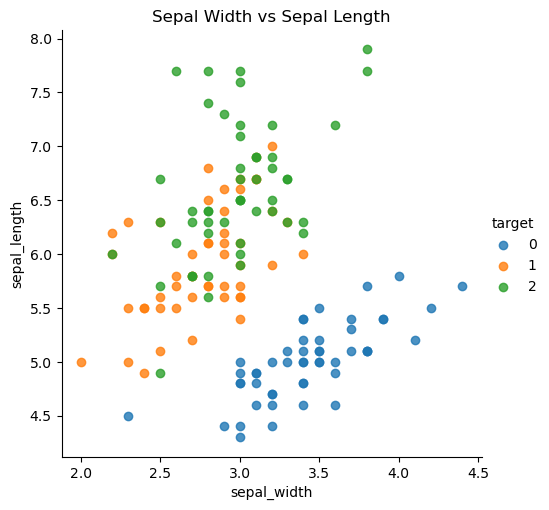

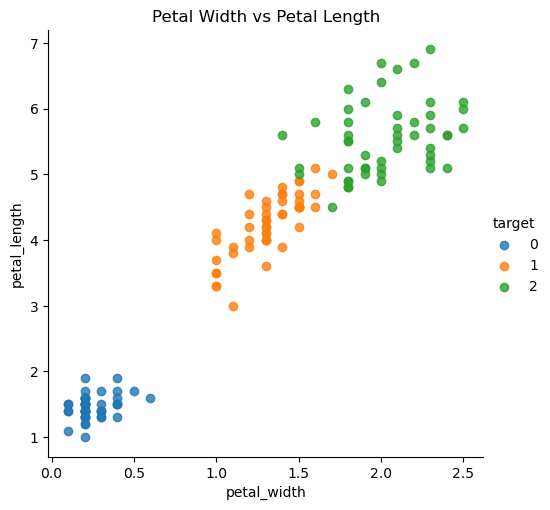

In [7]:
# Scatter plot for sepal_width vs sepal_length
sns.lmplot(x='sepal_width', y='sepal_length', data=df_iris, hue='target', fit_reg=False)
plt.title('Sepal Width vs Sepal Length')
plt.show()

# Scatter plot for petal_width vs petal_length
sns.lmplot(x='petal_width', y='petal_length', data=df_iris, hue='target', fit_reg=False)
plt.title('Petal Width vs Petal Length')
plt.show()

In [8]:
# Question 5: Prepare the data for classification.
# Define X and Y variables for the regression.
y = df_iris.target
X = df_iris[['sepal_width', 'sepal_length', 'petal_width', 'petal_length']]
X

,sepal_width,sepal_length,petal_width,petal_length
0,3.5,5.1,0.2,1.4
1,3.0,4.9,0.2,1.4
2,3.2,4.7,0.2,1.3
3,3.1,4.6,0.2,1.5
4,3.6,5.0,0.2,1.4
...,...,...,...,...
145,3.0,6.7,2.3,5.2
146,2.5,6.3,1.9,5.0
147,3.0,6.5,2.0,5.2
148,3.4,6.2,2.3,5.4


In [9]:
# Question 6: Split the data into train and test using sklearn train_test_split function.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [10]:
# Question 7:  Run the fit using KNeighborsClassifier from sklearn.neighbors.
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train) #train the model on the scaled training set

KNeighborsClassifier(n_neighbors=3)

In [11]:
# Question 8:
y_pred = knn_clf.predict(X_test) #make predictions for the scaled test set
print(y_test)
y_pred #these are the predictions made by the model

73     1
60     1
112    2
19     0
134    2
74     1
44     0
49     0
106    2
92     1
120    2
147    2
43     0
16     0
32     0
79     1
8      0
48     0
76     1
80     1
75     1
91     1
96     1
51     1
52     1
97     1
95     1
148    2
107    2
42     0
Name: target, dtype: int64


array([1, 1, 2, 0, 2, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 0])

In [12]:
from sklearn.metrics import accuracy_score
print("The accuracy score is: ", accuracy_score(y_test, y_pred))

predicted_classes = np.array(y_pred)
test_Y = np.array(y_test)

pred = predicted_classes == test_Y
correct_predictions = np.count_nonzero(pred)
incorrect_predictions = len(pred) - correct_predictions

print("Y prediction correct: ", correct_predictions)
print("Y prediction not correct: ", incorrect_predictions)

The accuracy score is:  0.9666666666666667
Y prediction correct:  29
Y prediction not correct:  1


In [13]:
# Question 9:
from statistics import mean

k_values = [1, 3, 5, 7, 10, 20, 30, 40, 50]
accuracyScoreArray = []
averageAccuracyScores = []
averageNumOfCorrectPred = []

for i, k in enumerate(k_values):
    accuracyScoreArray.append([])
    SumOfCorrectPredictions = 0
    for j in range(0,10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn_clf.fit(X_train, y_train)
        y_pred = knn_clf.predict(X_test)
        accuracyScoreArray[i].append(accuracy_score(y_test, y_pred))

        ## Correct predictions:
        predicted_classes = np.array(y_pred)
        test_Y = np.array(y_test)
        pred = predicted_classes == test_Y
        correct_predictions = np.count_nonzero(pred)
        SumOfCorrectPredictions += correct_predictions

    # average the number of correct predictions for each k value
    averageNumOfCorrectPred.append(SumOfCorrectPredictions/10)

    # Average accuracy score for each k value
    averageAccuracyScores.append(mean(accuracyScoreArray[i])) # / len(accuracyScoreArray[i]))

print ("Average Accuracy Scores for each K value (%): ")
for number in averageAccuracyScores:
    print("%.2f" % number)
print ("Average Number Of Correct Predictions per k value: ", averageNumOfCorrectPred)

Average Accuracy Scores for each K value (%): 
0.96
0.97
0.96
0.96
0.93
0.98
0.97
0.94
0.96
Average Number Of Correct Predictions per k value:  [28.9, 29.1, 28.9, 28.8, 27.8, 29.4, 29.1, 28.3, 28.9]


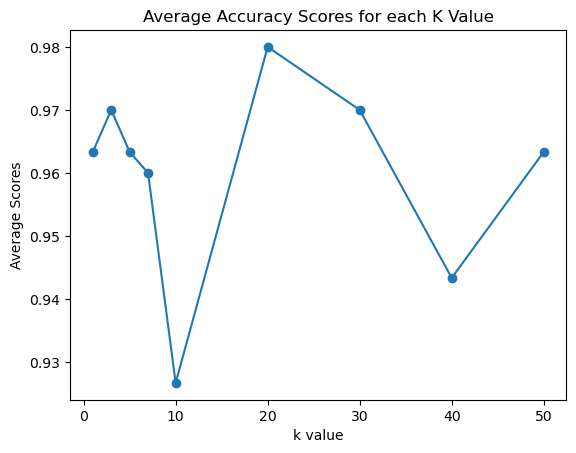

In [14]:
plt.plot(k_values, averageAccuracyScores, marker='o', linestyle='-')
plt.title('Average Accuracy Scores for each K Value')
plt.xlabel('k value')
plt.ylabel('Average Scores')
plt.show()

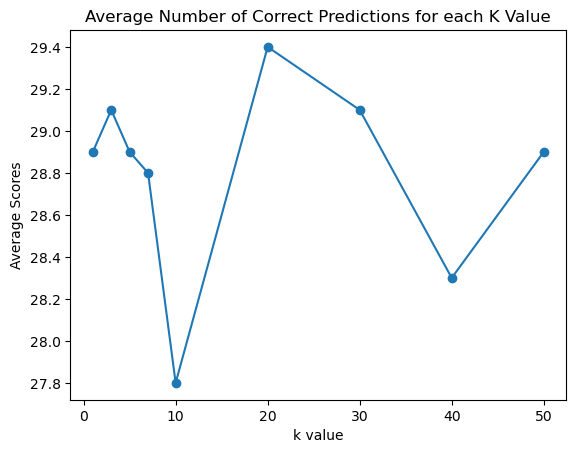

In [15]:
plt.plot(k_values, averageNumOfCorrectPred, marker='o', linestyle='-')
plt.title('Average Number of Correct Predictions for each K Value')
plt.xlabel('k value')
plt.ylabel('Average Scores')
plt.show()